In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [6]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [7]:
LE = LabelEncoder()

In [8]:
cols = df.select_dtypes(include=['object']).columns
df[cols]=df[cols].apply(LE.fit_transform)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


<AxesSubplot:>

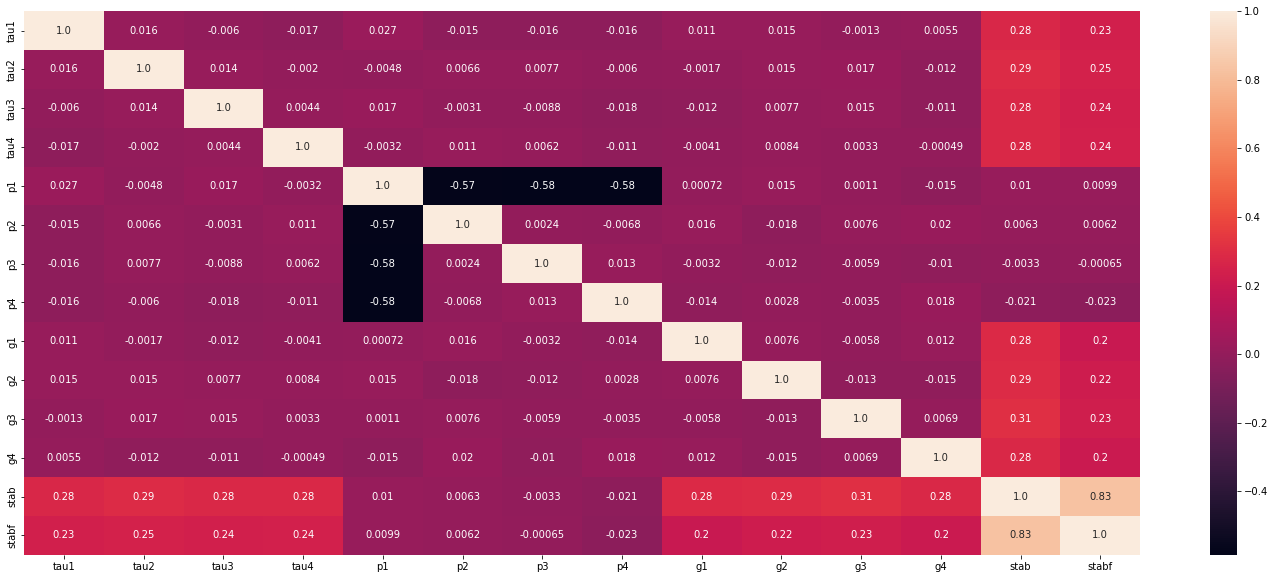

In [9]:
corr = df.corr()
plt.figure(figsize=(25,10))
sn.heatmap(corr,annot=True,fmt='.2')

In [28]:
scaler = MinMaxScaler()

In [33]:
normalised_df = pd.DataFrame(scaler.fit_transform(df))
normalised_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.258801,0.271561,0.829616,0.976978,0.509244,0.811642,0.495075,0.184572,0.632098,0.852229,0.881531,0.955894,0.715740,1.0
1,0.926793,0.463424,0.268117,0.091471,0.813957,0.039894,0.084809,0.496642,0.382588,0.855215,0.539078,0.770323,0.393359,0.0
2,0.891799,0.878795,0.268005,0.075171,0.425652,0.528367,0.481864,0.719670,0.118990,0.754440,0.831000,0.062980,0.442940,1.0
3,0.022700,0.754704,0.419623,0.193715,0.556118,0.648372,0.040670,0.668412,0.417084,0.975576,0.925677,0.329181,0.576507,1.0
4,0.277230,0.748301,0.467747,0.985065,0.453830,0.582991,0.102655,0.963811,0.786481,0.426782,0.638883,0.811553,0.686885,1.0


In [36]:
X = normalised_df.drop(columns=[12, 13], axis = 1)
y = normalised_df[13]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(m, n, test_size=0.2, random_state=1)

In [50]:
ran_f = RandomForestClassifier()
ran_f.fit(X, y)

RandomForestClassifier()

In [51]:
ran_f.score(X_test, y_test)

C:\Users\Vimah\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.653

In [52]:
Extra_tree = ExtraTreesClassifier()
Extra_tree.fit(X, y)

ExtraTreesClassifier()

In [53]:
Extra_tree.score(X_test, y_test)

C:\Users\Vimah\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


0.644

In [42]:
!pip3 install xgboost

In [54]:
from xgboost import XGBClassifier

In [44]:
xgc = XGBClassifier()
xgc.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [59]:
rs = RandomizedSearchCV(ExtraTreesClassifier(),{
    'max_depth':[2, 3, 5, 8],                                     # Defines the longest path allowed between root node and leaf node
    'n_estimators':[100, 150, 200, 300],                          # Number of Trees
    'max_samples':[0.1, 0.2, 0.3]                                 # Fraction of Original Dataset to be given to each tree
    },
      cv=5,
      return_train_score=False,
      n_iter=10
    )

In [60]:
rs

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(),
                   param_distributions={'max_depth': [2, 3, 5, 8],
                                        'max_samples': [0.1, 0.2, 0.3],
                                        'n_estimators': [100, 150, 200, 300]})